In [1]:
'''
todo
    son 10 yılın verilerini al
    tahmini göster testi değil
    eğitilcek verinin nasıl olacağının grafik üzerinde gösterimi
    
'''

'\ntodo\n    son 10 yılın verilerini al\n    tahmini göster testi değil\n    \n'

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#from pandas_datareader.data import DataReader
import yfinance as yf # veriyi alacağımız yer
from pandas_datareader import data as pdr
# For reading stock data from yahoo
#from pandas_datareader.data import DataReader
import yfinance as yf
#from pandas_datareader import data as pdr
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import plotly.express as px
from ann_visualizer.visualize import ann_viz;
from keras_visualizer import visualizer


In [2]:
sns.set_style('whitegrid') # tüm görselleştirmeler için bu stilin kullanılmasını sağlar. veya default stil seçilir
plt.style.use("fivethirtyeight") # tüm görselleştirmeler üzerinde bu stilin kullanılmasını sağlar. veya default stil seçilir
%matplotlib inline
# oluşturulacak figür jupiter notebooka gömülü olacak şekilde gözüksün

In [3]:
# Set up End and Start times for data grab
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['Apple', 'Google', 'Microsoft', 'Amazon']
dfs = []

end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

for stock in stocks: # verilerin alınması
    df = yf.download(stock, start_date, end_date)
    dfs.append(df)

for index, company_name in enumerate(company_names):
    dfs[index]['company_name'] = company_name

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
dfs[3]

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400,Amazon
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000,Amazon
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800,Amazon
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300,Amazon
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,129101300,Amazon
...,...,...,...,...,...,...,...
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000,Amazon
2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400,Amazon
2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500,Amazon


In [5]:
# tablolar hakkında
for df in dfs:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-31 to 2023-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-31 to 2023-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float

In [6]:
dfs[0].describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,164.338081,166.005240,162.826480,164.472040,164.128741,6.417777e+07
std,18.648764,18.483745,18.872515,18.658589,18.827456,2.001017e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,148.877495,150.544998,147.299995,148.819996,148.244358,5.042202e+07
50%,167.700005,169.405006,166.250000,167.925003,167.561661,5.891015e+07
75%,178.312504,180.052498,177.110004,178.555000,178.554108,7.134730e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.601569e+08


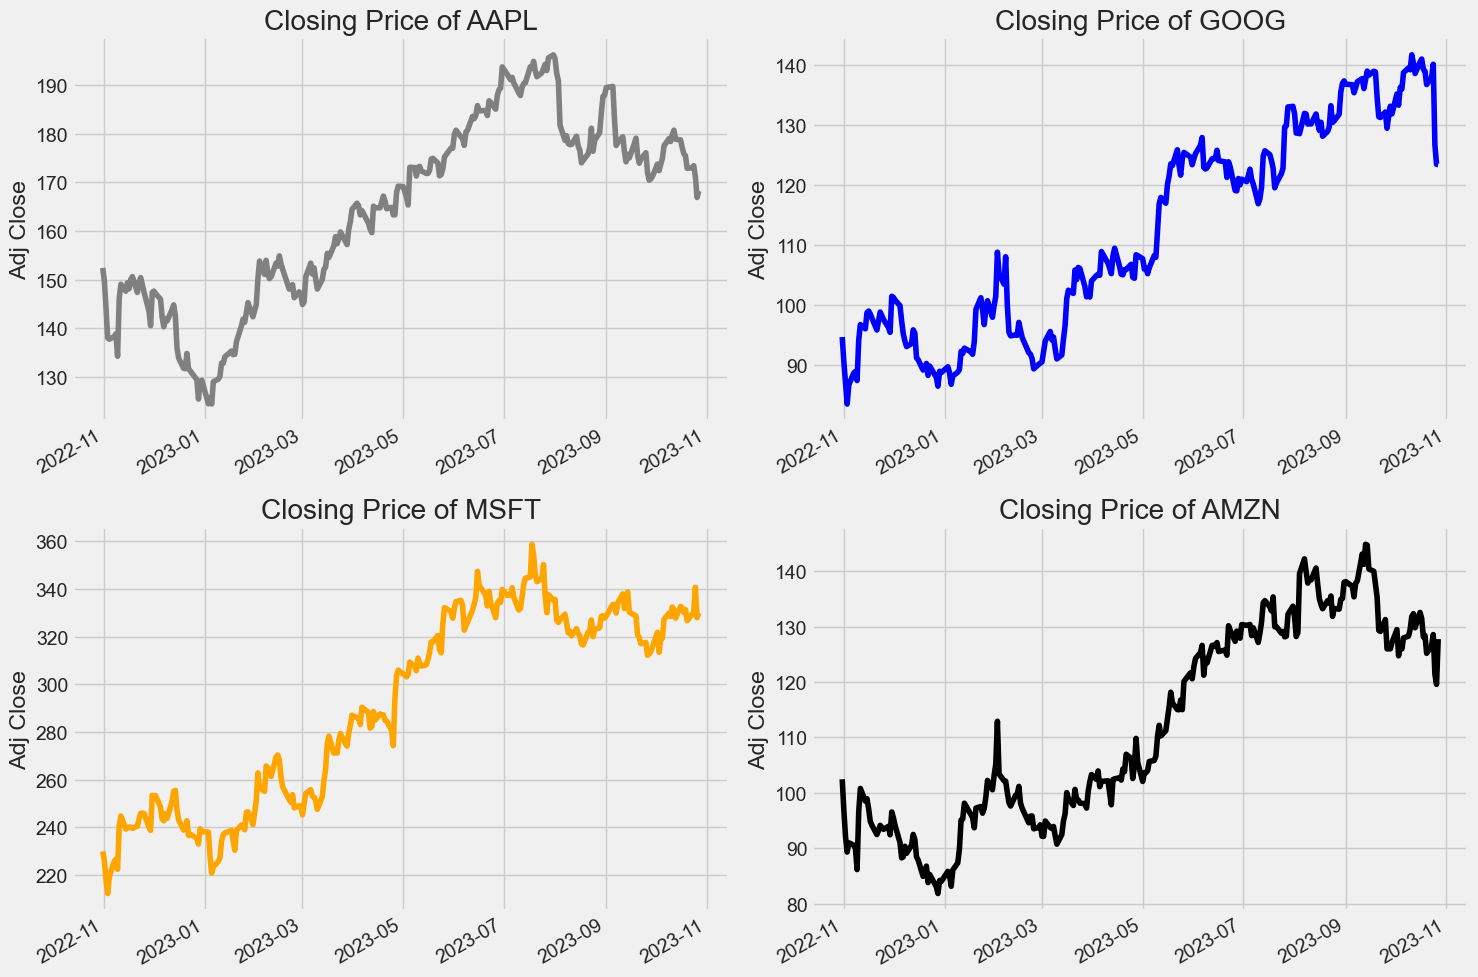

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colors = ['grey', 'blue', 'orange', 'black']

for i, company in enumerate(dfs, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colors[i - 1])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks[i - 1]}")
    
plt.tight_layout()

In [8]:
end_date = datetime(2023, 10, 29)
start_date = datetime(end_date.year - 10, end_date.month, end_date.day)

In [9]:
df = yf.download(stock, start_date, end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-29,17.948000,18.144501,17.814501,18.135000,18.135000,43708000
2013-10-30,18.131001,18.250000,17.932501,18.054001,18.054001,90044000
2013-10-31,18.086500,18.299999,17.950001,18.201500,18.201500,49336000
2013-11-01,18.281500,18.288500,17.805000,17.950001,17.950001,66620000
2013-11-04,18.006001,18.049999,17.719999,17.937000,17.937000,38768000
...,...,...,...,...,...,...
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000
2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400
2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500


In [10]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values.reshape(-1, 1) # değerler 2d dizi haline getirildi
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
training_data_len

2392

In [11]:
test_data_len

126

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) # değerler 0 ve 1 arasında değerler alacak şekilde normalize edildi

scaled_data

array([[0.02199184],
       [0.02152152],
       [0.02237796],
       ...,
       [0.6215343 ],
       [0.61096661],
       [0.6584051 ]])

In [13]:
train_data = scaled_data[0:int(training_data_len), :]

In [14]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
WINDOW_SIZE = 60
# Split the data into x_train and y_train data sets
# 59 değer x traine gider 60. değer y traine
x_train = []
y_train = []

for i in range(WINDOW_SIZE, len(train_data)):
    x_train.append(train_data[i-WINDOW_SIZE:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


'''
    x_train : y_train
    0, 1, 2, ..., 59 : 60    1.dizi # 0, 1 gibi değerler train_data'daki o indexdeti değerler
    1, 2, 3, ..., 60 : 61    2.dizi
    ...
'''

[array([0.02199184, 0.02152152, 0.02237796, 0.02091765, 0.02084217,
       0.02088571, 0.02009894, 0.01643509, 0.01839475, 0.01957636,
       0.0181683 , 0.02011056, 0.02335635, 0.02387022, 0.02300216,
       0.02264216, 0.0219541 , 0.02379763, 0.02478182, 0.02603892,
       0.02741214, 0.02896246, 0.03096857, 0.03058535, 0.02836729,
       0.02874471, 0.02831794, 0.02903213, 0.02843406, 0.02927309,
       0.0276502 , 0.0273773 , 0.02824536, 0.02961858, 0.02923535,
       0.03164793, 0.03142438, 0.03345953, 0.03366856, 0.03258856,
       0.03409533, 0.0322634 , 0.030896  , 0.03246954, 0.03223147,
       0.03178728, 0.03097147, 0.03224889, 0.03337824, 0.03311405,
       0.03214147, 0.03020212, 0.03210664, 0.0316218 , 0.03160148,
       0.03270759, 0.03486759, 0.03413888, 0.03278308, 0.02922083])]
[0.028837608513037072]

[array([0.02199184, 0.02152152, 0.02237796, 0.02091765, 0.02084217,
       0.02088571, 0.02009894, 0.01643509, 0.01839475, 0.01957636,
       0.0181683 , 0.02011056, 0.0

"\n    x_train : y_train\n    0, 1, 2, ..., 59 : 60    1.dizi # 0, 1 gibi değerler train_data'daki o indexdeti değerler\n    1, 2, 3, ..., 60 : 61    2.dizi\n    ...\n"

In [16]:
'''  2d
    [
        [2.71, 2.15],
        [3, 5]
    ] ->
    
    3d
    [ 
        [[2.71], [2.15]], 
        [[3], [5]]
    ]
'''
x_train, y_train = np.array(x_train), np.array(y_train) # veri setleri numpya çevrilir


In [18]:
x_train.shape, y_train.shape

((2332, 60), (2332,))

In [19]:
x_train

array([[0.02199184, 0.02152152, 0.02237796, ..., 0.03413888, 0.03278308,
        0.02922083],
       [0.02152152, 0.02237796, 0.02091765, ..., 0.03278308, 0.02922083,
        0.02883761],
       [0.02237796, 0.02091765, 0.02084217, ..., 0.02922083, 0.02883761,
        0.03120373],
       ...,
       [0.51550896, 0.52723796, 0.57229584, ..., 0.53339276, 0.51225738,
        0.52625088],
       [0.52723796, 0.57229584, 0.51701864, ..., 0.51225738, 0.52625088,
        0.55435396],
       [0.57229584, 0.51701864, 0.50999287, ..., 0.52625088, 0.55435396,
        0.52897987]])

In [20]:
y_train

array([0.02883761, 0.03120373, 0.02823374, ..., 0.55435396, 0.52897987,
       0.50923805])

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # numpya çevrilen x_train içerisindeki her değer 2d dizi haline getirilir

In [22]:
x_train

array([[[0.02199184],
        [0.02152152],
        [0.02237796],
        ...,
        [0.03413888],
        [0.03278308],
        [0.02922083]],

       [[0.02152152],
        [0.02237796],
        [0.02091765],
        ...,
        [0.03278308],
        [0.02922083],
        [0.02883761]],

       [[0.02237796],
        [0.02091765],
        [0.02084217],
        ...,
        [0.02922083],
        [0.02883761],
        [0.03120373]],

       ...,

       [[0.51550896],
        [0.52723796],
        [0.57229584],
        ...,
        [0.53339276],
        [0.51225738],
        [0.52625088]],

       [[0.52723796],
        [0.57229584],
        [0.51701864],
        ...,
        [0.51225738],
        [0.52625088],
        [0.55435396]],

       [[0.57229584],
        [0.51701864],
        [0.50999287],
        ...,
        [0.52625088],
        [0.55435396],
        [0.52897987]]])

In [23]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 92s 37ms/step - loss: 0.0018


In [24]:
test_data = scaled_data[training_data_len - 60: , :]
test_data

array([[0.51701864],
       [0.50999287],
       [0.50958643],
       [0.4976252 ],
       [0.48711554],
       [0.48345751],
       [0.49466391],
       [0.49559292],
       [0.50407034],
       [0.48659299],
       [0.48107685],
       [0.46586405],
       [0.47288982],
       [0.473064  ],
       [0.4595931 ],
       [0.46110278],
       [0.46383181],
       [0.45187054],
       [0.45163828],
       [0.4677221 ],
       [0.4610447 ],
       [0.45988344],
       [0.46203179],
       [0.45233507],
       [0.44350932],
       [0.45338022],
       [0.46760595],
       [0.47527043],
       [0.49756713],
       [0.4912381 ],
       [0.48403814],
       [0.50087679],
       [0.48978649],
       [0.48984457],
       [0.48647683],
       [0.48595428],
       [0.48130912],
       [0.49878647],
       [0.50894771],
       [0.51643801],
       [0.51132837],
       [0.52027023],
       [0.50372192],
       [0.50929609],
       [0.5099348 ],
       [0.49687034],
       [0.48473493],
       [0.511

In [40]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 0s 33ms/step


3.638243473653135

C:\Users\Tacab\AppData\Local\Temp\ipykernel_5092\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


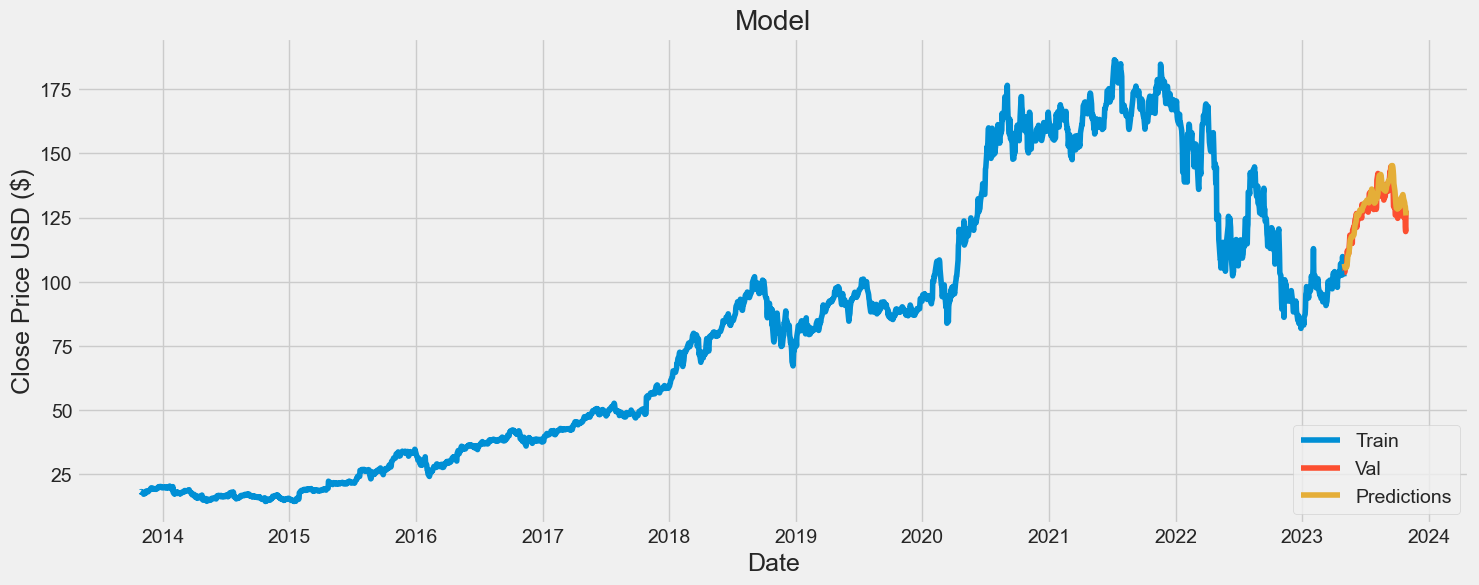

In [41]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()